# **CLASE 8 - INTRO A MACHINE LEARNING**

# **K-MEANS**

## Importamos librerías

In [1]:
# importar pandas
import pandas as pd

# importar matplotlib
import matplotlib.pyplot as plt

# importar matplotlib
import seaborn as sns

# importar el modelo de KMeans
from sklearn.cluster import KMeans

# importar datasets de sklearn
from sklearn.datasets import load_iris

## Carga de dataset

[Información datasets iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [2]:
# Carga de datos
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* Pasar el dataset a DataFrame

In [5]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2




---



## IRIS

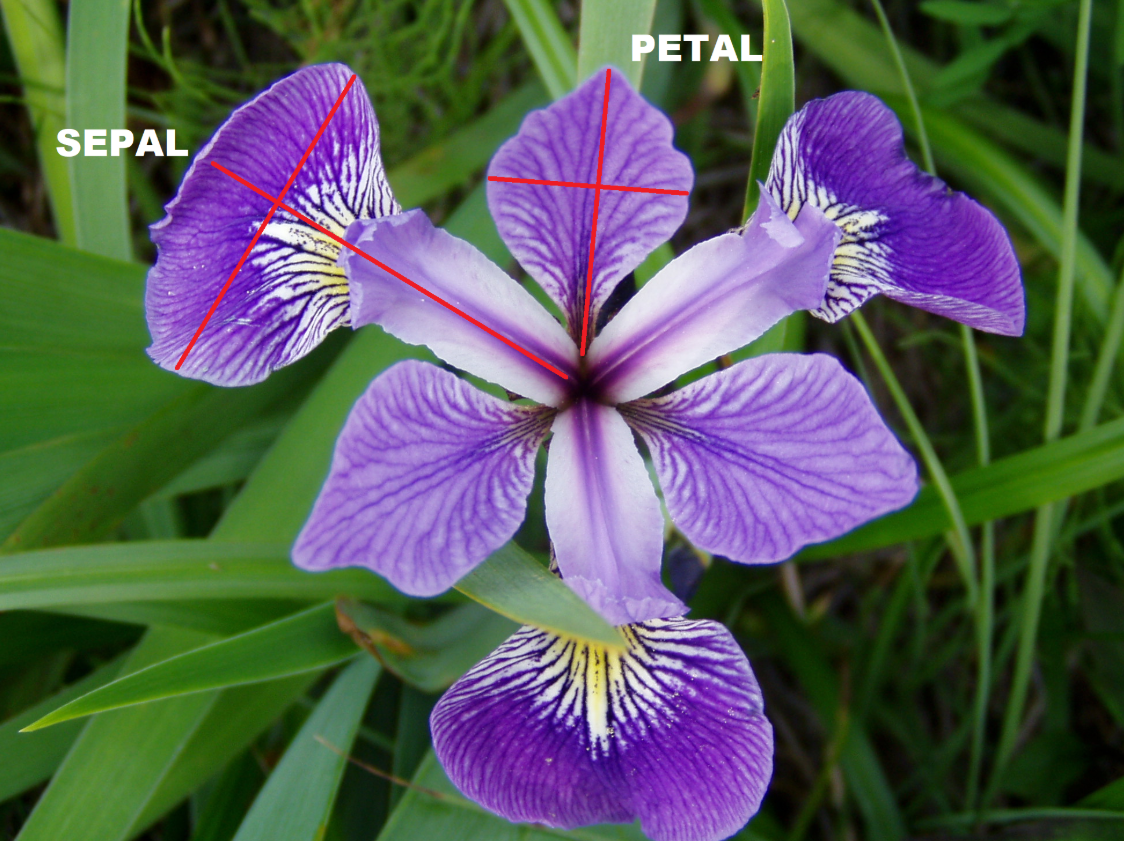

## 3 IRIS

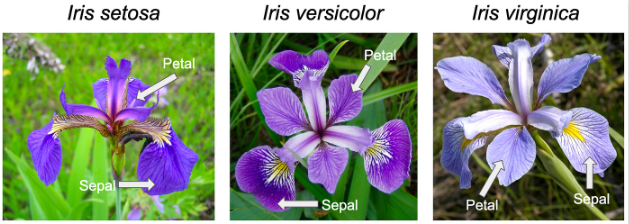



---



## Grafico pétalos

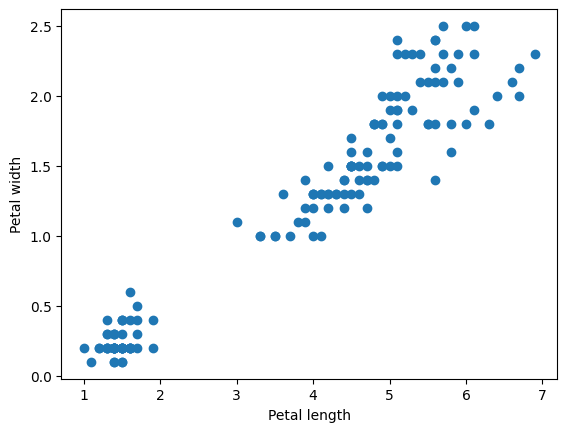

In [7]:
# Grafico de pétalos

plt.scatter(data["petal length (cm)"], data["petal width (cm)"])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

## Gráfico sépalos

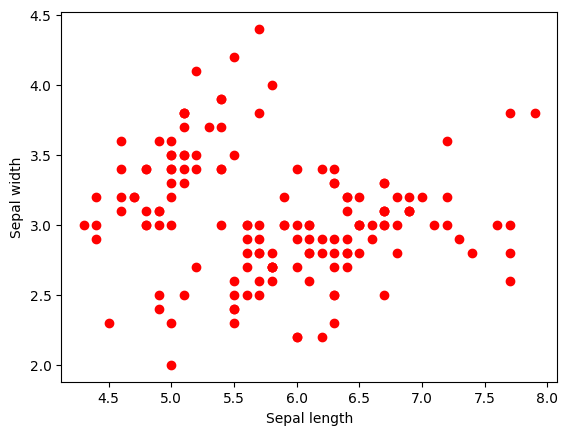

In [8]:
# Grafico de sépalos

plt.scatter(data["sepal length (cm)"], data["sepal width (cm)"], c = "red")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()



---



## Llamando a *K*-Means

In [9]:
# Importamos KMeans
from sklearn.cluster import KMeans

In [10]:
# ---
# Configurar el Objeto K-Means
# ---
# Llamamos al modelo.
# n_clusters=5: Le pedimos (como en el ejemplo de clase) que busque 5 grupos.
# n_init=10: Hará 10 intentos con semillas aleatorias para encontrar el mejor resultado.
# random_state=42: Para asegurar que siempre nos de el mismo resultado (reproducibilidad).

print("\n--- Configurando K-Means (K=5) ---")
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)


--- Configurando K-Means (K=5) ---


* **Entrenamos el modelo**

In [11]:
# ---
#Entrenar el Modelo
# ---
# Aquí ocurre la "magia". El algoritmo ajusta los centroides a los datos.
# Nota: Solo le pasamos 'X' (data), no hay 'y' (etiquetas).

print("\n--- Entrenando el modelo... ---")
kmeans.fit(data)
print("¡Modelo entrenado exitosamente!")


--- Entrenando el modelo... ---
¡Modelo entrenado exitosamente!


## Revisión de atributos

In [12]:
# ---
# Revisar Atributos del Modelo
# ---
# Una vez entrenado, inspeccionamos qué aprendió el modelo.

print("\n--- Resultados del Modelo ---")

# 1. Centroides: Las coordenadas centrales de cada uno de los 5 grupos.
print("\nCoordenadas de los 5 Centroides (Cluster Centers):\n")
print(kmeans.cluster_centers_)


--- Resultados del Modelo ---

Coordenadas de los 5 Centroides (Cluster Centers):

[[6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.006      3.428      1.462      0.246     ]
 [5.52962963 2.62222222 3.94074074 1.21851852]
 [6.22972973 2.85135135 4.76756757 1.57297297]
 [7.475      3.125      6.3        2.05      ]]


In [13]:
# 2. Etiquetas: A qué grupo (0, 1, 2, 3, 4) asignó cada flor.
# Mostramos solo las primeras 10 para no llenar la pantalla.
print("\nEtiquetas asignadas:")
print(kmeans.labels_)


Etiquetas asignadas:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 4 0 0 4 2 4 0 4 0
 0 0 3 0 0 0 4 4 3 0 3 4 3 0 4 3 3 0 4 4 4 0 3 3 4 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]


In [14]:
# 3. Inercia: La suma de las distancias al cuadrado dentro de los clusters.
# Mide qué tan "compactos" son los grupos (menor es mejor).
print(f"\nInercia del modelo (Distancia intra-cluster): {kmeans.inertia_:.2f}")


Inercia del modelo (Distancia intra-cluster): 46.46


* **Asigamos los clusters**

In [15]:
# ---
# Visualización y Análisis (Asignando Clusters)
# ---
# Agregamos la columna 'Cluster' a nuestro DataFrame original para poder graficar.

data['Cluster'] = kmeans.labels_
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


## Visualización de resultados


Generando gráfico para PÉTALOS...


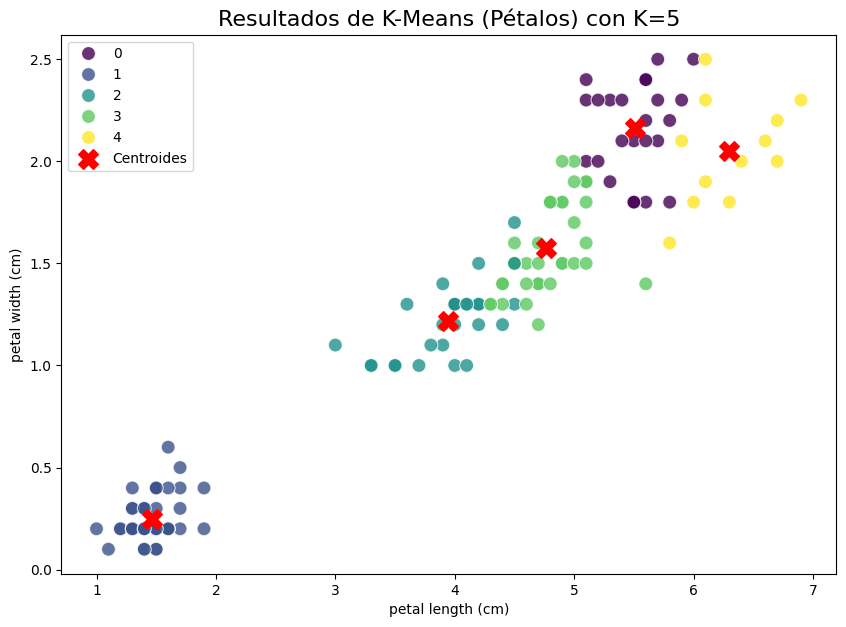

In [16]:
# -------------------------------------------------------
# GRÁFICO 1: PÉTALOS (Petal Length vs Petal Width)
# -------------------------------------------------------
print("\nGenerando gráfico para PÉTALOS...")
plt.figure(figsize=(10, 7))

# Usamos seaborn para facilitar el coloreado por categoría (hue)
sns.scatterplot(
    data=data,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='Cluster',       # Colorear según el grupo asignado
    palette='viridis',   # Paleta de colores distintiva
    s=100,               # Tamaño de los puntos
    alpha=0.8            # Transparencia
)

# También graficamos los CENTROIDES para ver dónde quedaron
# Nota: En iris.data, las columnas son [sepal_len, sepal_wid, petal_len, petal_wid]
# Por lo tanto, Pétalos son índices 2 y 3.
plt.scatter(
    kmeans.cluster_centers_[:, 2], # X del centroide (Largo Pétalo)
    kmeans.cluster_centers_[:, 3], # Y del centroide (Ancho Pétalo)
    c='red', s=200, marker='X', label='Centroides' # Marca roja grande
)

plt.title('Resultados de K-Means (Pétalos) con K=5', fontsize=16)
plt.legend()
plt.show()


Generando gráfico para SÉPALOS...


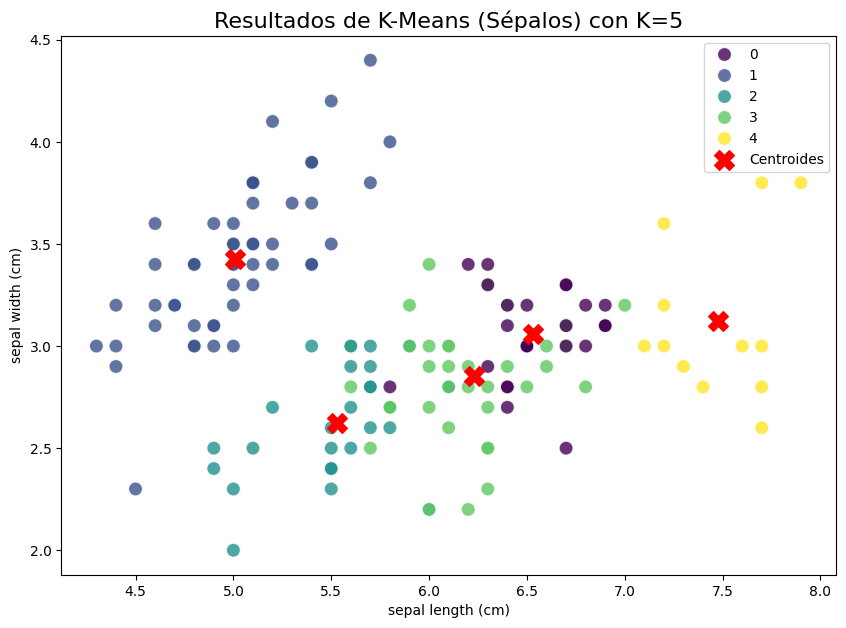

Análisis Visual: Observemos cómo los mismos grupos se ven diferentes según la vista.


In [17]:
# -------------------------------------------------------
# GRÁFICO 2: SÉPALOS (Sepal Length vs Sepal Width)
# -------------------------------------------------------
print("\nGenerando gráfico para SÉPALOS...")
plt.figure(figsize=(10, 7))

# Usamos las columnas de sépalos
sns.scatterplot(
    data=data,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='Cluster',       # Mismo cluster, distinta vista
    palette='viridis',
    s=100,
    alpha=0.8
)

# Graficamos los CENTROIDES correspondientes a sépalos
# Sépalos son índices 0 y 1.
plt.scatter(
    kmeans.cluster_centers_[:, 0], # X del centroide (Largo Sépalo)
    kmeans.cluster_centers_[:, 1], # Y del centroide (Ancho Sépalo)
    c='red', s=200, marker='X', label='Centroides'
)

plt.title('Resultados de K-Means (Sépalos) con K=5', fontsize=16)
plt.legend()
plt.show()

print("Análisis Visual: Observemos cómo los mismos grupos se ven diferentes según la vista.")



--- Bonus: Método del Codo (Buscando la K óptima) ---


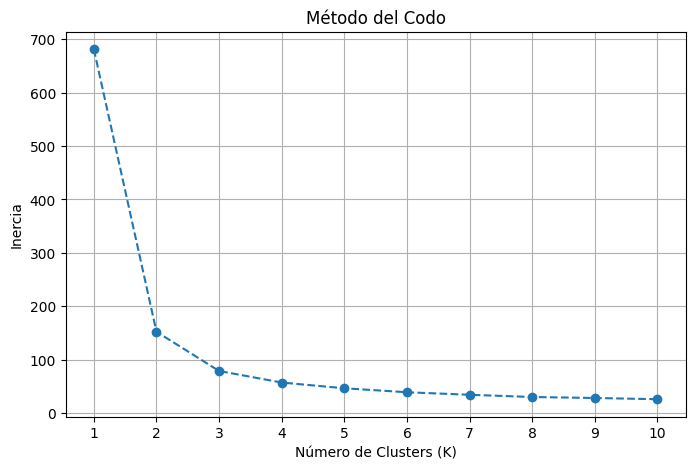

Conclusión: Observamos dónde la curva hace un 'codo' (probablemente en K=3).
Ese es el número óptimo de grupos para este dataset.


In [18]:
# ---
# Método del Codo (Elbow Method)
# ---
# Para saber cuál es la K óptima, probamos varios valores (ej. de 1 a 10)
# y graficamos la inercia.

print("\n--- Bonus: Método del Codo (Buscando la K óptima) ---")

inercias = []
rango_k = range(1, 11)

for k in rango_k:
    modelo_k = KMeans(n_clusters=k, n_init=10, random_state=42)
    modelo_k.fit(data.iloc[:, :-1]) # Usamos df sin la columna 'Cluster' que agregamos antes
    inercias.append(modelo_k.inertia_)

# Graficamos la curva
plt.figure(figsize=(8, 5))
plt.plot(rango_k, inercias, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(rango_k)
plt.grid(True)
plt.show()

print("Conclusión: Observamos dónde la curva hace un 'codo' (probablemente en K=3).")
print("Ese es el número óptimo de grupos para este dataset.")



---



---



---

